In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

stock_data = pd.read_csv('dfnew_clean.csv')

print(stock_data.isnull().sum())

print(stock_data)

DateTime            0
Volume              0
Transaction         0
Open                0
High                0
Low                 0
Close               0
Dir                 0
Change              0
ForeignBuy          0
ForeignSell         0
ForeignNet          0
TrustBuy            0
TrustSell           0
TrustNet            0
DealerNet           0
DealerBuy           0
DealerSell          0
InvestorsNet        0
PE-Ratio            0
PBR                 0
Yield               0
ForeignVol          0
TrustVol            0
DealerVol           0
InvestorsVol        0
Pattern             0
Trend               0
InvestorsNet_Dir    0
ForeignNet_Dir      0
TrustNet_Dir        0
DealerNet_Dir       0
Dir2                0
dtype: int64
        DateTime  Volume  Transaction   Open   High    Low  Close Dir  Change  \
0     2013-01-02   40647        14353   97.6   99.9   97.1   99.6   +     2.6   
1     2013-01-03   44335        12616  100.5  102.0  100.0  101.0   +     1.4   
2     2013-01-04  

AxesSubplot(0.125,0.11;0.62x0.77)
                    Volume  Transaction      Open      High       Low  \
Volume            1.000000     0.511070  0.080706  0.084567  0.076634   
Transaction       0.511070     1.000000  0.581849  0.584179  0.578932   
Open              0.080706     0.581849  1.000000  0.999903  0.999889   
High              0.084567     0.584179  0.999903  1.000000  0.999872   
Low               0.076634     0.578932  0.999889  0.999872  1.000000   
Close             0.080201     0.579960  0.999783  0.999901  0.999887   
Change            0.448827     0.662604  0.523904  0.528092  0.522624   
ForeignBuy        0.756565     0.127559 -0.096899 -0.093864 -0.098896   
ForeignSell       0.839921     0.375728 -0.018290 -0.016443 -0.021505   
ForeignNet       -0.224066    -0.302012 -0.072069 -0.071250 -0.070352   
TrustBuy          0.294050     0.321362  0.132828  0.134584  0.132360   
TrustSell         0.178188     0.035351 -0.088853 -0.088600 -0.089741   
TrustNet         

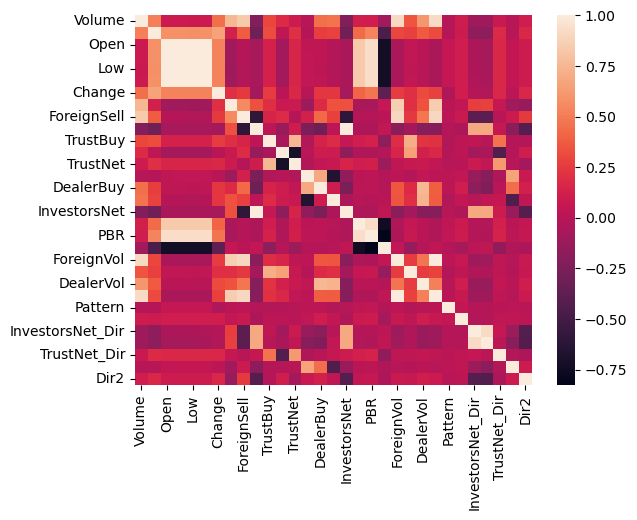

In [2]:
print(sns.heatmap(stock_data.corr()))
print(stock_data.corr())

In [31]:
# define the target and features
target = ['Close']
features = ['Transaction','Open', 'High', 'Low','Change','TrustBuy','TrustNet']

In [32]:
df = stock_data[features + target]
df

,Transaction,Open,High,Low,Change,TrustBuy,TrustNet,Close
0,14353,97.6,99.9,97.1,2.6,1746,1599,99.6
1,12616,100.5,102.0,100.0,1.4,926,410,101.0
2,10276,100.5,101.5,100.0,0.5,234,44,101.5
3,9042,101.0,101.0,99.1,1.0,203,-722,100.5
4,9463,99.6,100.0,98.9,0.8,209,-426,99.7
...,...,...,...,...,...,...,...,...
2447,16718,454.0,457.0,453.5,1.5,225,-69,456.5
2448,13482,458.0,462.5,457.0,0.5,67,61,457.0
2449,59400,451.0,452.0,446.0,6.0,276,-59,451.0
2450,34637,444.0,449.5,442.5,5.0,134,-123,446.0


In [33]:
# split the data
split = int(df.shape[0] * 0.8)
df_train = df.iloc[:split, :].copy()
df_test = df.iloc[split:, :].copy()

In [34]:
# scale the data
target_scaler = MinMaxScaler().fit(df_train[target])
df_train[target] = target_scaler.transform(df_train[target])
df_test[target] = target_scaler.transform(df_test[target])

features_scaler = MinMaxScaler().fit(df_train[features])
df_train[features] = features_scaler.transform(df_train[features])
df_test[features] = features_scaler.transform(df_test[features])

df_train

,Transaction,Open,High,Low,Change,TrustBuy,TrustNet,Close
0,0.145621,0.010748,0.011625,0.009834,0.067532,0.353799,0.644491,0.012076
1,0.126567,0.017523,0.016508,0.016624,0.036364,0.187639,0.513095,0.015327
2,0.100898,0.017523,0.015345,0.016624,0.012987,0.047416,0.472649,0.016489
3,0.087362,0.018692,0.014183,0.014517,0.025974,0.041135,0.387999,0.014166
4,0.091980,0.015421,0.011858,0.014048,0.020779,0.042351,0.420709,0.012308
...,...,...,...,...,...,...,...,...
1956,0.127960,0.976636,0.969774,0.971904,0.025974,0.008916,0.470549,0.965165
1957,0.152587,0.983645,0.976750,0.976586,0.025974,0.000000,0.421373,0.967487
1958,0.466482,0.897196,0.908161,0.894638,0.077922,0.008916,0.470660,0.883883
1959,0.176709,0.985981,0.981400,0.983610,0.000000,0.065856,0.458062,0.976777


In [35]:
# extract the input sequences and output values
sequence_length = 5

X_train, y_train = [], []

for i in range(sequence_length, df_train.shape[0]):
    X_train.append(df_train[features + target].iloc[i - sequence_length: i])
    y_train.append(df_train[target].iloc[i])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []

for i in range(sequence_length, df_test.shape[0]):
    X_test.append(df_test[features + target].iloc[i - sequence_length: i])
    y_test.append(df_test[target].iloc[i])

X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape)
print(X_test.shape)

(1956, 5, 8)
(486, 5, 8)


In [36]:
print(X_train)
print(X_test)

[[[0.14562148 0.01074766 0.0116252  ... 0.35379939 0.6444911  0.01207617]
  [0.12656728 0.01752336 0.01650779 ... 0.18763931 0.51309537 0.01532745]
  [0.10089841 0.01752336 0.01534527 ... 0.04741641 0.47264891 0.01648862]
  [0.08736192 0.01869159 0.01418275 ... 0.04113475 0.38799867 0.01416628]
  [0.09198012 0.01542056 0.01185771 ... 0.04235056 0.42070947 0.01230841]]

 [[0.12656728 0.01752336 0.01650779 ... 0.18763931 0.51309537 0.01532745]
  [0.10089841 0.01752336 0.01534527 ... 0.04741641 0.47264891 0.01648862]
  [0.08736192 0.01869159 0.01418275 ... 0.04113475 0.38799867 0.01416628]
  [0.09198012 0.01542056 0.01185771 ... 0.04235056 0.42070947 0.01230841]
  [0.07171927 0.01752336 0.01302023 ... 0.02634245 0.45529893 0.01300511]]

 [[0.10089841 0.01752336 0.01534527 ... 0.04741641 0.47264891 0.01648862]
  [0.08736192 0.01869159 0.01418275 ... 0.04113475 0.38799867 0.01416628]
  [0.09198012 0.01542056 0.01185771 ... 0.04235056 0.42070947 0.01230841]
  [0.07171927 0.01752336 0.0130202

In [37]:
# build and train the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
# model.add(LSTM(units=200, activation="tanh", return_sequences=False))
# model.add(Dropout(0.2))
# model.add(LSTM(units=20, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=60, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=120, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Dense(units=50))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 50)             11800     
                                                                 
 dropout_2 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 73,221
Trainable params: 73,221
Non-trai

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

train_history=model.fit(X_train, y_train, epochs=50, batch_size=64)

model.evaluate(X_test, y_test)

#save the model
model.save('LSTM_eps50_bsize64.h5')

# generate the test set predictions
y_pred = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred)

Epoch 1/50
31/31 [==============================] - 2s 8ms/step - loss: 0.0134
Epoch 2/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 3/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 5/50
31/31 [==============================] - 0s 8ms/step - loss: 8.6616e-04
Epoch 6/50
31/31 [==============================] - 0s 8ms/step - loss: 8.7461e-04
Epoch 7/50
31/31 [==============================] - 0s 8ms/step - loss: 7.8796e-04
Epoch 8/50
31/31 [==============================] - 0s 8ms/step - loss: 7.3371e-04
Epoch 9/50
31/31 [==============================] - 0s 7ms/step - loss: 7.7614e-04
Epoch 10/50
31/31 [==============================] - 0s 8ms/step - loss: 7.9067e-04
Epoch 11/50
31/31 [==============================] - 0s 8ms/step - loss: 6.4370e-04
Epoch 12/50
31/31 [==============================] - 0s 9ms/step - loss: 6.7351e-04
Epoch 13/50
31/31

In [39]:
# import matplotlib.pyplot as plt
# train_history.history
# plt.plot(train_history.history["loss"])
# plt.plot(train_history.history["val_loss"])
# plt.title("Train History")
# plt.ylabel("loss")
# plt.xlabel("Epoch")
# plt.legend(['train','validation'],loc='upper left')
# plt.show()

In [40]:
# plot the test set predictions
df['Predicted'] = np.nan
df['Predicted'].iloc[- y_pred.shape[0]:] = y_pred.flatten()
# plot=df[['Close', 'Predicted Close']].plot()
# fig = plot.get_figure()
# fig.savefig("multi_intput_LSTM_model_eps32_bsize64.png")

In [41]:
res=pd.concat([stock_data['DateTime'],df],axis=1)
dfpred=res[['DateTime','Open','Close', 'Predicted']].dropna()
dfpred

,DateTime,Open,Close,Predicted
1966,2021-01-08,580.0,580.0,537.130249
1967,2021-01-11,577.0,584.0,547.991943
1968,2021-01-12,583.0,591.0,557.155457
1969,2021-01-13,595.0,605.0,569.744385
1970,2021-01-14,587.0,592.0,578.563477
...,...,...,...,...
2447,2022-12-26,454.0,456.5,462.962891
2448,2022-12-27,458.0,457.0,459.890076
2449,2022-12-28,451.0,451.0,457.152863
2450,2022-12-29,444.0,446.0,453.195374


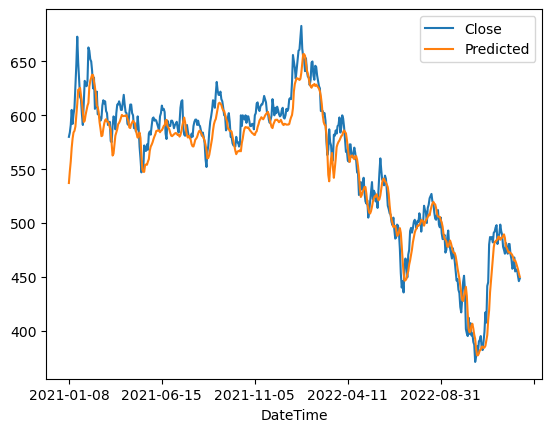

In [42]:
plot=dfpred.plot(x='DateTime',y=['Close','Predicted'])
fig = plot.get_figure()
fig.savefig("LSTM_eps32_bsize64.png")

In [43]:
# model.save('BEST.h5')
# fig.savefig("BEST.png")

In [44]:
dfpred.to_csv('pred.csv', encoding='utf-8',index=None)

In [ ]:
test.loc[test.Close.shift(1) >= test.Close, "Trend"]= 0
test.loc[test.Close.shift(1) < test.Close, "Trend"]= 1
test['Trend']=test['Trend'].fillna(0).astype(int)
test.loc[test.Predicted.shift(1) >= test.Predicted, "PredTrend"]= 0
test.loc[test.Predicted.shift(1) < test.Predicted, "PredTrend"]= 1
test['PredTrend']=test['PredTrend'].fillna(0).astype(int)
test.loc[test.Predicted.shift(1) >= test.Close.shift(1), "PredvsTrend"]= 0
test.loc[test.Predicted.shift(1) < test.Close.shift(1), "PredvsTrend"]= 1
test['PredvsTrend']=test['PredvsTrend'].fillna(0).astype(int)